<a href="https://colab.research.google.com/github/radhakrishnan-omotec/gait-freeze-repository/blob/main/Week8_KNN_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN_Binary_Classification


In [60]:
!git clone https://github.com/radhakrishnan-omotec/gait-freeze-repository.git

fatal: destination path 'gait-freeze-repository' already exists and is not an empty directory.


### Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Models

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Loading Dataset

Merging videos

In [64]:
import pandas as pd

# List of CSV file paths to merge
csv_files = ['/content/gait-freeze-repository/inputs/patient1_input.csv',
             '/content/gait-freeze-repository/inputs/patient2_input.csv',
             '/content/gait-freeze-repository/inputs/patient3_input.csv',
             '/content/gait-freeze-repository/inputs/person1_input.csv',
             '/content/gait-freeze-repository/inputs/person2_input.csv',
             '/content/gait-freeze-repository/inputs/person3_input.csv']

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate the DataFrames into one DataFrame
merged_df = pd.concat(dfs, ignore_index=False)  # Set ignore_index=True to reset the index

# Save the merged DataFrame to a new CSV file (optional)
merged_df.to_csv('/content/gait-freeze-repository/inputs/input.csv', index=True)  # Set index=False to exclude the index column

# Print a summary of the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
        Type  Input1  Input2  Input3    F1    F2    F3    F4     F5    F6  \
0  patient 1   500.0       0       0  0.13  0.97  0.26  2.14   7.57 -1.65   
1  patient 1   553.0       0       0  0.13  0.98  0.26  2.14   7.69 -1.53   
2  patient 1   563.0       0       0  0.12  0.99  0.25  1.89   6.71 -1.34   
3  patient 1   605.0       0       0  0.07  0.99  0.27  2.75   4.88 -1.83   
4  patient 1   646.0       0       0  0.13  0.97  0.39  4.33  29.48 -5.31   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [66]:
data = pd.read_csv("/content/gait-freeze-repository/inputs/input.csv")

In [ ]:
data = data.drop("Input", axis=1)

### Checking for Missing data

In [68]:
data.isnull().sum()

Unnamed: 0    0
Type          0
Input1        0
Input2        0
Input3        0
F1            0
F2            0
F3            0
F4            0
F5            0
F6            0
Target        0
dtype: int64

In [69]:
data.head()

,Unnamed: 0,Type,Input1,Input2,Input3,F1,F2,F3,F4,F5,F6,Target
0,0,patient 1,500.0,0,0,0.13,0.97,0.26,2.14,7.57,-1.65,0
1,1,patient 1,553.0,0,0,0.13,0.98,0.26,2.14,7.69,-1.53,0
2,2,patient 1,563.0,0,0,0.12,0.99,0.25,1.89,6.71,-1.34,0
3,3,patient 1,605.0,0,0,0.07,0.99,0.27,2.75,4.88,-1.83,0
4,4,patient 1,646.0,0,0,0.13,0.97,0.39,4.33,29.48,-5.31,0


In [70]:
data.tail()

,Unnamed: 0,Type,Input1,Input2,Input3,F1,F2,F3,F4,F5,F6,Target
1425,213,person 3,11059.0,636,799,-0.10,0.61,-1.23,91.49,69.70,31.68,1
1426,214,person 3,11111.0,609,697,0.17,0.52,-0.58,60.55,-7.63,18.80,1
1427,215,person 3,11161.0,614,697,0.12,0.56,-0.71,70.86,7.87,2.75,1
1428,216,person 3,11210.0,614,685,0.12,0.50,-0.69,67.08,28.32,-2.99,1
1429,217,person 3,11261.0,613,681,0.18,0.54,-0.62,47.12,30.64,-7.20,1


### Checking Datatypes of each column

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1430 non-null   int64  
 1   Type        1430 non-null   object 
 2   Input1      1430 non-null   float64
 3   Input2      1430 non-null   int64  
 4   Input3      1430 non-null   int64  
 5   F1          1430 non-null   float64
 6   F2          1430 non-null   float64
 7   F3          1430 non-null   float64
 8   F4          1430 non-null   float64
 9   F5          1430 non-null   float64
 10  F6          1430 non-null   float64
 11  Target      1430 non-null   int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 134.2+ KB


In [72]:
data2 = data

In [73]:
# Create df2 with only the specified columns
columns_to_copy = ["Type", "F1", "F2", "F3", "F4", "F5", "F6", "Target"]
data = data2[columns_to_copy].copy()

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    1430 non-null   object 
 1   F1      1430 non-null   float64
 2   F2      1430 non-null   float64
 3   F3      1430 non-null   float64
 4   F4      1430 non-null   float64
 5   F5      1430 non-null   float64
 6   F6      1430 non-null   float64
 7   Target  1430 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 89.5+ KB


### Find Correlation

In [75]:
corr_matrix = data.corr()
print(corr_matrix)

              F1        F2        F3        F4        F5        F6    Target
F1      1.000000 -0.089444 -0.002389  0.005185  0.008177 -0.019722  0.032266
F2     -0.089444  1.000000  0.381131  0.118301  0.010009  0.088265 -0.012881
F3     -0.002389  0.381131  1.000000  0.138597 -0.503733 -0.203517 -0.201581
F4      0.005185  0.118301  0.138597  1.000000 -0.138841  0.170490  0.024264
F5      0.008177  0.010009 -0.503733 -0.138841  1.000000  0.085217  0.033987
F6     -0.019722  0.088265 -0.203517  0.170490  0.085217  1.000000  0.041444
Target  0.032266 -0.012881 -0.201581  0.024264  0.033987  0.041444  1.000000


### Plotting Correlation Heatmap

In [76]:
top_corr_features = corr_matrix.index

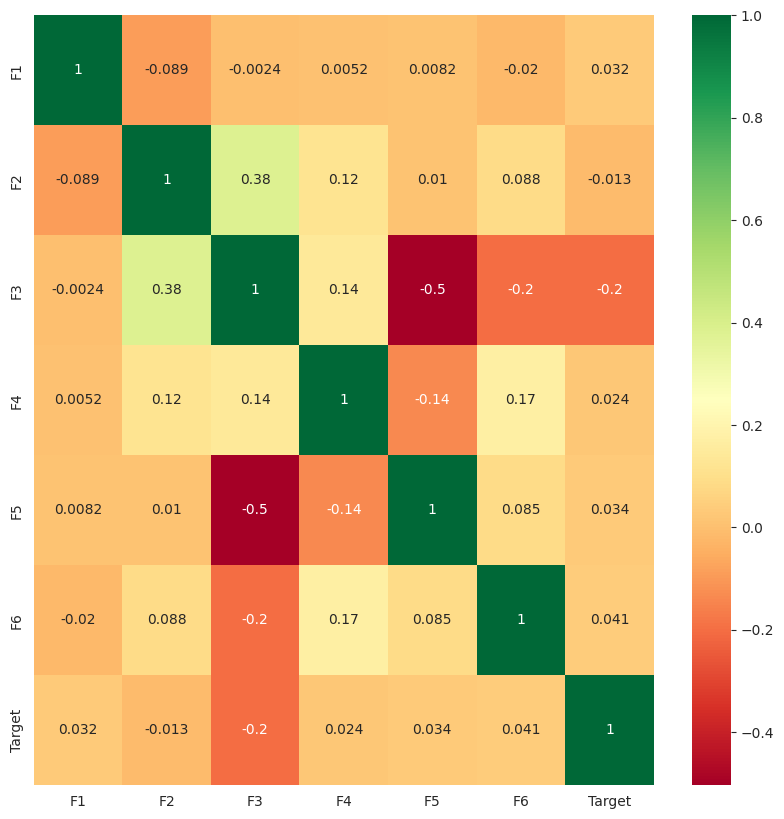

In [77]:
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Checking Data Balance

<Axes: xlabel='Target', ylabel='count'>

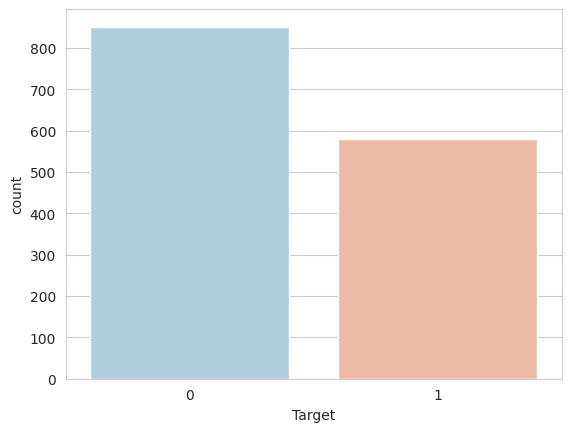

In [79]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=data,palette='RdBu_r')

### Splitting into X and y

In [80]:
feature_cols = ['F1','F2','F3','F4','F5','F6']
X = data[feature_cols]
y = data['Target']

## 1. KNearest Neighbors Classification Model

## Finding the best value for K

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

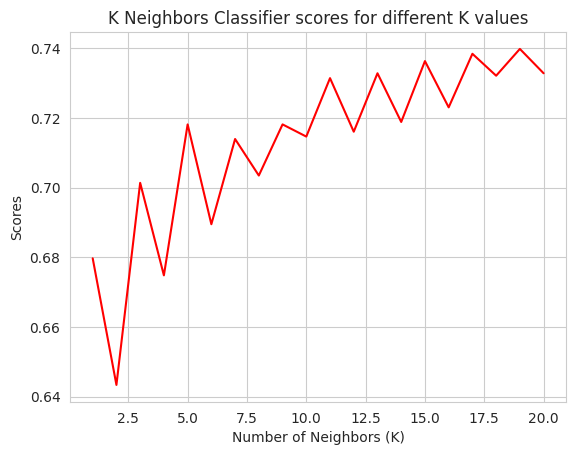

In [81]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [82]:
knn = KNeighborsClassifier(n_neighbors = 5)
score=cross_val_score(knn_classifier,X,y,cv=10)
print(score.mean())

0.7328671328671329


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [84]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.7272727272727273


---
